#PyTorch Autograd



##Example 01

In [1]:
#Manual Computation
# y = x**2
def dy_dx(x):
  return 2*x

In [2]:
dy_dx(3)

6

In [3]:
#Autograd
import torch
a = torch.tensor(3.0, requires_grad= True)
a #require_grad helps start making dynamic computation graph.

tensor(3., requires_grad=True)

In [4]:
b = a**2
b

tensor(9., grad_fn=<PowBackward0>)

In [5]:
b.backward() #computes backward pass from root node to leaf node. Here b is root node and a is leaf node

In [6]:
a.grad # displays value for leaf node

tensor(6.)


##Example 02

In [7]:
#Manual
#y = x**2
#z = sin(y)
import math
def dz_dx(x):
  return 2*x*math.cos(x**2)

In [8]:
dz_dx(4)

-7.661275842587077

In [9]:
#Autograd
a = torch.tensor(4.0, requires_grad=True)
a

tensor(4., requires_grad=True)

In [10]:
b = a**2
b

tensor(16., grad_fn=<PowBackward0>)

In [11]:
c = torch.sin(b)
c

tensor(-0.2879, grad_fn=<SinBackward0>)

In [12]:
c.backward()

In [13]:
a.grad

tensor(-7.6613)

In [14]:
b.grad #By default we can only compute gradients of leaf nodes, here b is an intermediate node.

/tmp/ipython-input-3274485692.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  b.grad #By default we can only compute gradients of leaf nodes, here b is an intermediate node.


#Example 03 -- A Perceptron

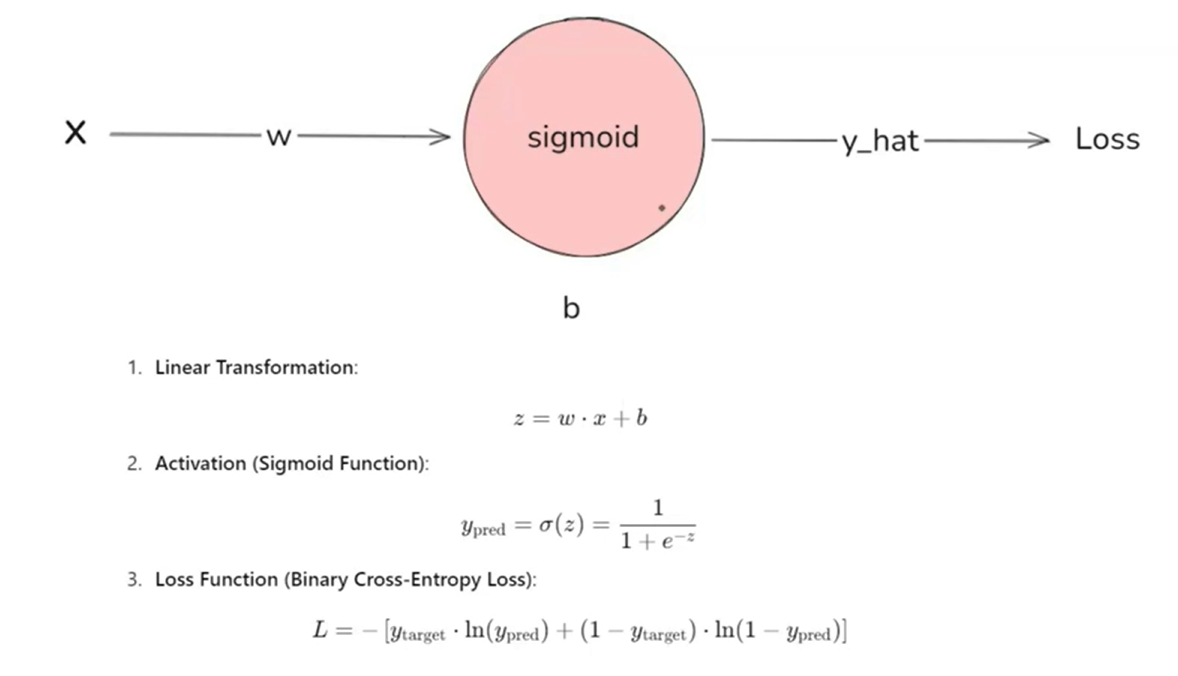

In [25]:
#Manual

## Dataset for Binary Classification
x = 6.7
y = 0

def binary_cross_entropy(n1, n1_pred):
  return -((n1 * math.log(n1_pred)) + ((1 - n1) * math.log(1-n1_pred)))

def sigmoid(n):
  return 1/(1+math.exp(-n))

#Weight-Bias
w = 1.0
b = 0.0

In [26]:
## Forward Pass
z = w*x + b
z

6.7

In [27]:
y_pred = sigmoid(z)
y_pred

0.9987706013787226

In [28]:
## Loss Calculation
L = binary_cross_entropy(y, y_pred)
L

6.701230154951767

In [29]:
## Backward Pass

dL_dYpred = ((y_pred - y)/(y_pred*(1-y_pred)))

dYpred_dz = (y_pred*(1-y_pred))

dz_dw = x

dz_db = 1

dL_dw = dL_dYpred * dYpred_dz * dz_dw
dL_db = dL_dYpred * dYpred_dz * dz_db

print(dL_dw, dL_db)


6.691763029237442 0.9987706013787226


In [30]:
## The Next Step would be Update Gradients which we will not do now

In [40]:
#AutoGrad
x = torch.tensor(6.7)
y = torch.tensor(0)

w = torch.tensor(1.0,requires_grad=True)
b = torch.tensor(0.0,requires_grad=True)

def binary_cross_entropy(n1, n1_pred):
  return -((n1 * torch.log(n1_pred)) + ((1 - n1) * torch.log(1-n1_pred)))

def sigmoid(n):
  return 1/(1+torch.exp(-n))

In [41]:
## Forward Pass
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [42]:
y_pred = sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<MulBackward0>)

In [43]:
## Loss Calculation
L = binary_cross_entropy(y, y_pred)
L

tensor(6.7012, grad_fn=<NegBackward0>)

In [44]:
L.backward()

In [45]:
w.grad

tensor(6.6914)

In [46]:
b.grad

tensor(0.9987)

##Other Concepts

###Autograd for vectors

In [104]:
a = torch.tensor([1.0,2.0,3.0],requires_grad=True)
a

tensor([1., 2., 3.], requires_grad=True)

In [106]:
b = (a**2).mean()
b

tensor(4.6667, grad_fn=<MeanBackward0>)

In [108]:
b.backward()

In [109]:
a.grad

tensor([0.6667, 1.3333, 2.0000])

###Clearing the Gradient

In [69]:
#Problem: On multiple passes, the gradient don't get auto zeroed and instead get adds upon the earlier available value.

x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [83]:
#re-run from here

In [101]:
y = x**2
y


tensor(9., grad_fn=<PowBackward0>)

In [102]:
y.backward()


In [103]:
x.grad

tensor(24.)

In [91]:
#to stop this, use this
x.grad.zero_()

tensor(0.)

###Disabling the Gradient Tracking

In [110]:
#Option 01
x = torch.tensor(3.0,requires_grad=True)
x

tensor(3., requires_grad=True)

In [111]:
y = x**2
y

tensor(9., grad_fn=<PowBackward0>)

In [112]:
y.backward()
x.grad

tensor(6.)

In [115]:
x.requires_grad_(False)

tensor(3.)

In [116]:
y = x**2
y

tensor(9.)

In [117]:
#Option 02
x = torch.tensor(3.0,requires_grad=True)
x

tensor(3., requires_grad=True)

In [120]:
z = x.detach_()
z

tensor(3.)

In [121]:
#Option 03
x = torch.tensor(3.0,requires_grad=True)
x

tensor(3., requires_grad=True)

In [122]:
with torch.no_grad():
  y = x**2
y

tensor(9.)